In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
#from skimage import io
from skimage.color import rgb2gray

In [2]:
im = imageio.imread('elbphilharmonie.jpg')
im = rgb2gray(im)

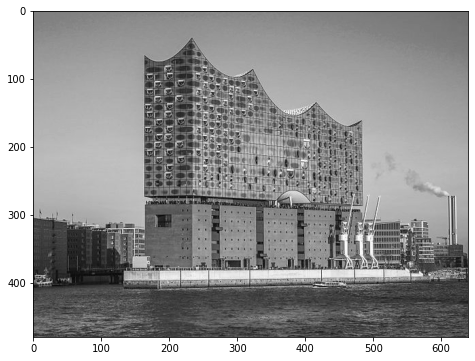

In [3]:
plt.figure(figsize=(8,6))
plt.imshow(im, cmap='gray')


# K-Means

In [4]:
import random
from skimage.color import label2rgb

In [5]:
#im_copy = im
#im_copy = np.ndarray.flatten(im_copy)
np.random.seed(0)
k = 3
epsilon = 0.001
center1 = [random.randint(0, im.shape[0]), random.randint(0, im.shape[1])]
center1 = im[center1[0], center1[1]]
center2 = [random.randint(0, im.shape[0]), random.randint(0, im.shape[1])]
center2 = im[center2[0], center2[1]]
center3 = [random.randint(0, im.shape[0]), random.randint(0, im.shape[1])]
center3 = im[center3[0], center3[1]]

label_im = np.zeros(np.shape(im))
np.shape(im)

(480, 640)

In [6]:
center1, center2, center3

(0.5481494117647059, 0.258821568627451, 0.59584)

In [7]:
def clusters(center1, center2, center3):
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            x = im[i,j]
            #if np.linalg.norm(center1 - x) < np.linalg.norm(center2 - x) and np.linalg.norm(center1 - x) < np.linalg.norm(center3 - x):
             #   label_im[i,j] = 1
            #elif np.linalg.norm(center2 - x) < np.linalg.norm(center1 - x) and np.linalg.norm(center2 - x) < np.linalg.norm(center3- x):
             #   label_im[i,j] = 2
            #elif np.linalg.norm(center3 - x) < np.linalg.norm(center1 - x) and np.linalg.norm(center3 - x) < np.linalg.norm(center2- x):
            #    label_im[i,j] = 3
            if np.abs(center1 - x) < np.abs(center2 - x) and np.abs(center1 - x) < np.abs(center3 - x):
                label_im[i,j] = 1
            elif np.abs(center2 - x) < np.abs(center1 - x) and np.abs(center2 - x) < np.abs(center3- x):
                label_im[i,j] = 2
            elif np.abs(center3 - x) < np.abs(center1 - x) and np.abs(center3 - x) < np.abs(center2- x):
                label_im[i,j] = 3


In [8]:
def update_clusters():
    one = []
    two = []
    three = []
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if label_im[i,j] == 1:
                one.append(im[i,j])
            elif label_im[i,j] == 2:
                two.append(im[i,j])
            elif label_im[i,j] == 3:
                three.append(im[i,j])
                
    new_center1 = np.average(one)
    new_center2 = np.average(two)
    new_center3 = np.average(three)
    
    return new_center1, new_center2, new_center3
    #return one, two, three

In [9]:
c = 0
while True:
    print(c)
    clusters(center1, center2, center3)
    new_center1, new_center2, new_center3 = update_clusters()
    if np.abs(center1 - new_center1) < epsilon and np.abs(center2 - new_center2) < epsilon and np.abs(center3 - new_center3) < epsilon:
        break
    else:
        center1, center2, center3 = new_center1, new_center2, new_center3
        c += 1

0
1
2
3
4
5
6
7
8


/home/ankit/UHH/Jupyter/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


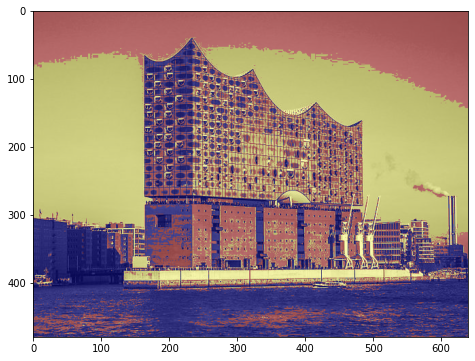

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(label2rgb(label_im, im))